In [54]:
from dotenv import load_dotenv
import os
import requests
import json
import pandas as pd
import quandl
import matplotlib
import hvplot.pandas
import seaborn as sns

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
quandl.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')

In [4]:
# Downtown San Francisco 97559, 97563, 97566, 97587

downtown_sf_sfh = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['97559', '97563','97566','97587'])
downtown_sf_sfh['year'] = pd.DatetimeIndex(downtown_sf_sfh['date']).year
downtown_sf_sfh = downtown_sf_sfh[downtown_sf_sfh['year']>2018]
downtown_sf_sfh = downtown_sf_sfh.drop('region_id', axis=1)
downtown_sf_sfh.head()


,indicator_id,date,value,year
None,,,,
0,ZSFH,2020-12-31,2664073.0,2020
1,ZSFH,2020-11-30,2699389.0,2020
2,ZSFH,2020-10-31,2729402.0,2020
3,ZSFH,2020-09-30,2866089.0,2020
4,ZSFH,2020-08-31,2699777.0,2020


In [5]:
# Downtown San Francisco 97559, 97563, 97566, 97587

downtown_sf_con = quandl.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id=['97559', '97563','97566','97587'])
downtown_sf_con['year'] = pd.DatetimeIndex(downtown_sf_con['date']).year
downtown_sf_con = downtown_sf_con[downtown_sf_con['year']>2018]
downtown_sf_con = downtown_sf_con.drop('region_id', axis=1)
downtown_sf_con.head()


,indicator_id,date,value,year
None,,,,
0,ZCON,2020-12-31,1266141.0,2020
1,ZCON,2020-11-30,1290762.0,2020
2,ZCON,2020-10-31,1309095.0,2020
3,ZCON,2020-09-30,1294788.0,2020
4,ZCON,2020-08-31,1313287.0,2020


In [6]:
combined_downtown_sf = pd.concat([downtown_sf_sfh, downtown_sf_con], ignore_index=True)
combined_downtown_sf = combined_downtown_sf.groupby(['date', 'indicator_id']).mean()
combined_downtown_sf = combined_downtown_sf.reset_index()
combined_downtown_sf.head()

,date,indicator_id,value,year
0,2019-01-31,ZCON,1.365521e+06,2019
1,2019-01-31,ZSFH,2.447277e+06,2019
2,2019-02-28,ZCON,1.361768e+06,2019
3,2019-02-28,ZSFH,2.451767e+06,2019
4,2019-03-31,ZCON,1.357396e+06,2019


In [7]:
downtown_sf = combined_downtown_sf.pivot(index='date', columns='indicator_id', values='value')
downtown_sf = downtown_sf.sort_values(by='date', ascending=False)
downtown_sf.head()

indicator_id,ZCON,ZSFH
date,,
2020-12-31,1248317.75,2.215787e+06
2020-11-30,1267817.25,2.243083e+06
2020-10-31,1280626.75,2.261638e+06
2020-09-30,1261777.25,2.445179e+06
2020-08-31,1280774.75,2.246275e+06


In [8]:
# Outside San Francisco 97583, 97571, 97565, 97578, 97581, 97576, 97572, 97585

outside_sf_sfh = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['97583', '97571', '97565', '97578', '97581', '97576', '97572', '97585'])
outside_sf_sfh['year'] = pd.DatetimeIndex(outside_sf_sfh['date']).year
outside_sf_sfh = outside_sf_sfh[outside_sf_sfh['year']>2018]
outside_sf_sfh = outside_sf_sfh.drop('region_id', axis=1)
outside_sf_sfh.head()


,indicator_id,date,value,year
None,,,,
0,ZSFH,2020-12-31,1749568.0,2020
1,ZSFH,2020-11-30,1765812.0,2020
2,ZSFH,2020-10-31,1777774.0,2020
3,ZSFH,2020-09-30,1778404.0,2020
4,ZSFH,2020-08-31,1819147.0,2020


In [9]:
# Outside San Francisco 97583, 97571, 97565, 97578, 97581, 97576, 97572, 97585

outside_sf_con = quandl.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id=['97583', '97571', '97565', '97578', '97581', '97576', '97572', '97585'])
outside_sf_con['year'] = pd.DatetimeIndex(outside_sf_con['date']).year
outside_sf_con = outside_sf_con[outside_sf_con['year']>2018]
outside_sf_con = outside_sf_con.drop('region_id', axis=1)
outside_sf_con.head()


,indicator_id,date,value,year
None,,,,
0,ZCON,2020-12-31,1103565.0,2020
1,ZCON,2020-11-30,1109323.0,2020
2,ZCON,2020-10-31,1114537.0,2020
3,ZCON,2020-09-30,1106962.0,2020
4,ZCON,2020-08-31,1201492.0,2020


In [10]:
combined_outside_sf = pd.concat([outside_sf_sfh, outside_sf_con], ignore_index=True)
combined_outside_sf = combined_outside_sf.groupby(['date', 'indicator_id']).mean()
combined_outside_sf = combined_outside_sf.reset_index()
combined_outside_sf.head()

,date,indicator_id,value,year
0,2019-01-31,ZCON,1.230017e+06,2019
1,2019-01-31,ZSFH,1.981683e+06,2019
2,2019-02-28,ZCON,1.231472e+06,2019
3,2019-02-28,ZSFH,1.976900e+06,2019
4,2019-03-31,ZCON,1.231561e+06,2019


In [11]:
outside_sf = combined_outside_sf.pivot(index='date', columns='indicator_id', values='value')
outside_sf = outside_sf.sort_values(by='date', ascending=False)
outside_sf.head()

indicator_id,ZCON,ZSFH
date,,
2020-12-31,1.168135e+06,1906426.625
2020-11-30,1.178642e+06,1922650.250
2020-10-31,1.186206e+06,1938858.375
2020-09-30,1.175782e+06,1945869.750
2020-08-31,1.233734e+06,1949617.625


<AxesSubplot:xlabel='date'>

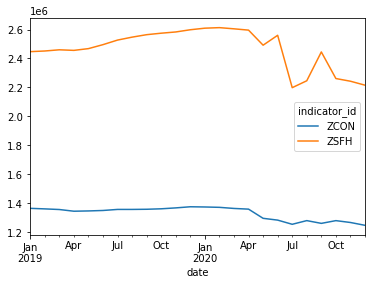

In [12]:
downtown_sf.plot()

<AxesSubplot:xlabel='date'>

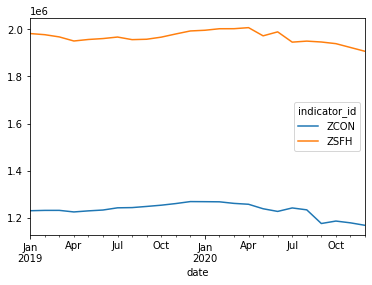

In [13]:
outside_sf.plot()

In [14]:
downtown_sf.hvplot()*outside_sf.hvplot()

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [15]:
# Pulling median sale price data for San Francisco metro

sf_median_sale_price = quandl.get_table('ZILLOW/DATA', indicator_id='SRAM', region_id='395057')
sf_median_sale_price = sf_median_sale_price.set_index('date')
sf_median_sale_price = sf_median_sale_price.drop('region_id', axis=1)
   
sf_median_sale_price.head()

,indicator_id,value
date,,
2020-11-30,SRAM,920000.0
2020-10-31,SRAM,908000.0
2020-09-30,SRAM,905000.0
2020-08-31,SRAM,910000.0
2020-07-31,SRAM,900000.0


In [16]:
sf_median_sale_price.hvplot()

:Curve   [date]   (value)

In [17]:
# Pulling rental price data for San Francisco metro

sf_rental_price = quandl.get_table('ZILLOW/DATA', indicator_id='RSNA', region_id='395057')
sf_rental_price = sf_rental_price.set_index('date')
sf_rental_price = sf_rental_price.drop('region_id', axis=1)

sf_rental_price.head()

,indicator_id,value
date,,
2020-12-31,RSNA,2924.0
2020-11-30,RSNA,2941.0
2020-10-31,RSNA,2943.0
2020-09-30,RSNA,3046.0
2020-08-31,RSNA,3154.0


In [44]:
sf_rental_price.hvplot()

:Curve   [date]   (value)

In [18]:
# Pulling inventory data for San Francisco metro

sf_inventory_data = quandl.get_table('ZILLOW/DATA', indicator_id='IRAM', region_id='395057')
sf_inventory_data = sf_inventory_data.set_index('date')
sf_inventory_data = sf_inventory_data.drop('region_id', axis=1)
   
sf_inventory_data.head()

,indicator_id,value
date,,
2020-12-31,IRAM,8447.0
2020-11-30,IRAM,9706.0
2020-10-31,IRAM,10059.0
2020-09-30,IRAM,9680.0
2020-08-31,IRAM,9266.0


In [48]:
sf_inventory_data.hvplot()

:Curve   [date]   (value)

In [19]:
downtown_sf_sort = downtown_sf.sort_index()
pct_change_downtown = downtown_sf_sort.pct_change()
pct_change_downtown = pct_change_downtown.dropna()
pct_change_downtown.head()

indicator_id,ZCON,ZSFH
date,,
2019-02-28,-0.002748,0.001834
2019-03-31,-0.003211,0.003377
2019-04-30,-0.008630,-0.001610
2019-05-31,0.001407,0.004913
2019-06-30,0.002360,0.011123


<AxesSubplot:xlabel='date'>

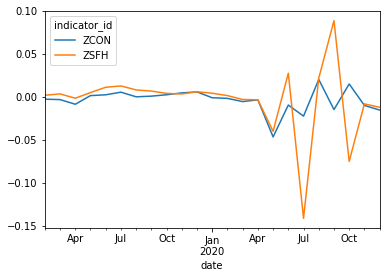

In [20]:
pct_change_downtown.plot()

In [21]:
outside_sf_sort = outside_sf.sort_index()
pct_change_outside = outside_sf_sort.pct_change()
pct_change_outside = pct_change_outside.dropna()
pct_change_outside.head()

indicator_id,ZCON,ZSFH
date,,
2019-02-28,0.001183,-0.002414
2019-03-31,0.000072,-0.004798
2019-04-30,-0.005434,-0.008793
2019-05-31,0.003749,0.003322
2019-06-30,0.002887,0.001977


<AxesSubplot:xlabel='date'>

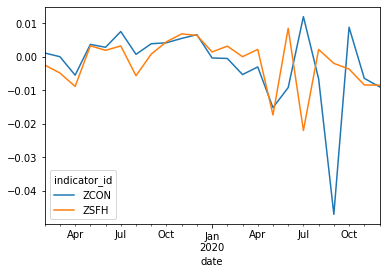

In [22]:
pct_change_outside.plot()

In [23]:
combine1 = pct_change_downtown
combine1.columns = ['Downtown Condo','Downtown Single Family Home'] 
combine2 = pct_change_outside
combine2.columns = ['Outside Condo','Outside Single Family Home']
combined_pct_change_outside = pd.concat([combine1, combine2], axis = 1, ignore_index=False, sort=False)
combined_pct_change_outside



,Downtown Condo,Downtown Single Family Home,Outside Condo,Outside Single Family Home
date,,,,
2019-02-28,-0.002748,0.001834,0.001183,-0.002414
2019-03-31,-0.003211,0.003377,0.000072,-0.004798
2019-04-30,-0.008630,-0.001610,-0.005434,-0.008793
2019-05-31,0.001407,0.004913,0.003749,0.003322
2019-06-30,0.002360,0.011123,0.002887,0.001977
2019-07-31,0.005395,0.012644,0.007586,0.003288
2019-08-31,0.000001,0.008022,0.000770,-0.005607
2019-09-30,0.000788,0.006667,0.003942,0.000849
2019-10-31,0.002389,0.003997,0.004231,0.004541


In [24]:
downtown_condo_vs_outside_condo = pd.DataFrame()
downtown_condo_vs_outside_condo['Downtown Condo'] = combined_pct_change_outside['Downtown Condo']
downtown_condo_vs_outside_condo['Outside Condo'] = combined_pct_change_outside['Outside Condo']
downtown_condo_vs_outside_condo.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [25]:
downtown_home_vs_outside_home = pd.DataFrame()
downtown_home_vs_outside_home['Downtown Single Family Home'] = combined_pct_change_outside['Downtown Single Family Home']
downtown_home_vs_outside_home['Outside Single Family Home'] = combined_pct_change_outside['Outside Single Family Home']
downtown_home_vs_outside_home.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [26]:
downtown_condo_vs_outside_home = pd.DataFrame()
downtown_condo_vs_outside_home['Downtown Condo'] = combined_pct_change_outside['Downtown Condo']
downtown_condo_vs_outside_home['Outside Single Family Home'] = combined_pct_change_outside['Outside Single Family Home']
downtown_condo_vs_outside_home.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [27]:
pct_change_downtown.hvplot()*pct_change_outside.hvplot()

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [28]:
sf_county_covid_nums = pd.read_csv('sf_county_covid.csv')
sf_county_covid_nums.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,San Francisco,65,0,65,0,2020-03-18
1,San Francisco,80,0,15,0,2020-03-19
2,San Francisco,87,0,7,0,2020-03-20
3,San Francisco,106,0,19,0,2020-03-21
4,San Francisco,134,0,28,0,2020-03-22


In [29]:
sf_county_covid_nums.hvplot.line(x="date", y="totalcountconfirmed")

:Curve   [date]   (totalcountconfirmed)

In [30]:
sf_county_covid_nums.hvplot.line(x="date", y="newcountconfirmed")

:Curve   [date]   (newcountconfirmed)

In [31]:
sf_county_covid_nums.hvplot.line(x="date", y="totalcountdeaths")

:Curve   [date]   (totalcountdeaths)

In [32]:
sf_county_covid_nums.hvplot.line(x="date", y="newcountdeaths")

:Curve   [date]   (newcountdeaths)

In [33]:
pct_change_sf_county_covid_nums = sf_county_covid_nums.drop('county', axis=1)
pct_change_sf_county_covid_nums = pct_change_sf_county_covid_nums.set_index('date')
pct_change_sf_county_covid_nums = pct_change_sf_county_covid_nums.pct_change()
pct_change_sf_county_covid_nums.head()


,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths
date,,,,
2020-03-18,NaN,NaN,NaN,NaN
2020-03-19,0.230769,NaN,-0.769231,NaN
2020-03-20,0.087500,NaN,-0.533333,NaN
2020-03-21,0.218391,NaN,1.714286,NaN
2020-03-22,0.264151,NaN,0.473684,NaN


In [34]:
pct_change_sf_county_covid_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 2020-03-18 to 2021-01-31
Data columns (total 4 columns):
totalcountconfirmed    319 non-null float64
totalcountdeaths       314 non-null float64
newcountconfirmed      317 non-null float64
newcountdeaths         194 non-null float64
dtypes: float64(4)
memory usage: 12.5+ KB


In [35]:
pct_change_sf_county_covid_nums.hvplot(x="date", y="newcountdeaths")

:Curve   [date]   (newcountdeaths)

In [36]:
sf_county_new_covid_nums_bymonth = pd.DataFrame()
sf_county_new_covid_nums_bymonth['newcountconfirmed'] = sf_county_covid_nums['newcountconfirmed']
sf_county_new_covid_nums_bymonth['newcountdeaths'] = sf_county_covid_nums['newcountdeaths']
sf_county_new_covid_nums_bymonth['date'] = sf_county_covid_nums['date']
sf_county_new_covid_nums_bymonth = sf_county_new_covid_nums_bymonth.set_index('date')
sf_county_new_covid_nums_bymonth.index = pd.to_datetime(sf_county_new_covid_nums_bymonth.index)
sf_county_new_covid_nums_bymonth = sf_county_new_covid_nums_bymonth.groupby(pd.Grouper(freq='M')).sum()
sf_county_new_covid_nums_bymonth.head()

,newcountconfirmed,newcountdeaths
date,,
2020-03-31,404,5
2020-04-30,1114,21
2020-05-31,983,16
2020-06-30,1100,8
2020-07-31,2525,9


In [70]:
sf_county_total_covid_nums = pd.DataFrame()
sf_county_total_covid_nums['totalcountconfirmed'] = sf_county_covid_nums['totalcountconfirmed']
sf_county_total_covid_nums['totalcountdeaths'] = sf_county_covid_nums['totalcountdeaths']
sf_county_total_covid_nums['date'] = sf_county_covid_nums['date']
sf_county_total_covid_nums = sf_county_total_covid_nums.set_index('date')
sf_county_total_covid_nums.index = pd.to_datetime(sf_county_total_covid_nums.index)
sf_county_total_covid_nums.columns = ['Total Cases','Total Deaths']
sf_county_total_covid_nums

,Total Cases,Total Deaths
date,,
2020-03-18,65,0
2020-03-19,80,0
2020-03-20,87,0
2020-03-21,106,0
2020-03-22,134,0
2020-03-23,152,0
2020-03-24,181,1
2020-03-25,213,2
2020-03-26,261,1


In [69]:
sf_county_total_covid_nums.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [37]:
pct_change_sf_county_new_covid_nums_bymonth = sf_county_new_covid_nums_bymonth.pct_change()
pct_change_sf_county_new_covid_nums_bymonth.head()

,newcountconfirmed,newcountdeaths
date,,
2020-03-31,NaN,NaN
2020-04-30,1.757426,3.200000
2020-05-31,-0.117594,-0.238095
2020-06-30,0.119023,-0.500000
2020-07-31,1.295455,0.125000


In [38]:
pct_change_sf_county_new_covid_nums_bymonth.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [121]:
pct_change_sf_county_new_covid_nums_bymonth.hvplot()*downtown_condo_vs_outside_home[12:].hvplot()

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [40]:
sf_median_sale_price = sf_median_sale_price.drop(columns = 'indicator_id')
sf_median_sale_price.columns = ['SF Median Sale Price']
sf_median_sale_price.head()

,SF Median Sale Price
date,
2020-11-30,920000.0
2020-10-31,908000.0
2020-09-30,905000.0
2020-08-31,910000.0
2020-07-31,900000.0


In [45]:
sf_rental_price = sf_rental_price.drop(columns = 'indicator_id')
sf_rental_price.columns = ['SF Rental Price']
sf_rental_price.head()


,SF Rental Price
date,
2020-12-31,2924.0
2020-11-30,2941.0
2020-10-31,2943.0
2020-09-30,3046.0
2020-08-31,3154.0


In [50]:
sf_inventory_data = sf_inventory_data.drop(columns = 'indicator_id')
sf_inventory_data.columns = ['SF Inventory']
sf_inventory_data.head()

,SF Inventory
date,
2020-12-31,8447.0
2020-11-30,9706.0
2020-10-31,10059.0
2020-09-30,9680.0
2020-08-31,9266.0


In [60]:
sf_county_new_covid_nums_bymonth.columns = ['New Cases','New Deaths']
downtown_sf.columns = ['DT Condo Value','DT SF Home Value']
outside_sf.columns = ['OT Condo Value','OT SF Home Value']
combined_sf_data = pd.concat([sf_county_new_covid_nums_bymonth,sf_county_total_covid_nums,downtown_sf,outside_sf,sf_median_sale_price,sf_rental_price,sf_inventory_data],axis = "columns", join="inner")
combined_sf_data.head()

,New Cases,New Deaths,Total Cases,Total Deaths,DT Condo Value,DT SF Home Value,OT Condo Value,OT SF Home Value,SF Median Sale Price,SF Rental Price,SF Inventory
date,,,,,,,,,,,
2020-03-31,404,5,404,5,1364804.00,2.604865e+06,1.261182e+06,2002280.250,830000.0,3293.0,5788.0
2020-04-30,1114,21,1518,26,1359996.50,2.595869e+06,1.257425e+06,2006781.000,850000.0,3292.0,6016.0
2020-05-31,983,16,2501,42,1296626.75,2.491827e+06,1.238403e+06,1972028.500,833750.0,3270.0,6568.0
2020-06-30,1100,8,3601,50,1284227.00,2.560207e+06,1.227085e+06,1988898.375,860000.0,3254.0,7370.0
2020-07-31,2525,9,6126,59,1255405.75,2.198641e+06,1.241849e+06,1945266.375,900000.0,3240.0,8636.0


<AxesSubplot:xlabel='New Cases', ylabel='DT Condo Value'>

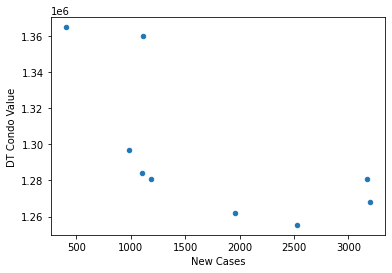

In [42]:
combined_sf_data.plot(kind='scatter',x ='New Cases', y='DT Condo Value')

In [61]:
combined_sf_data_correlation = combined_sf_data.corr()
combined_sf_data_correlation

,New Cases,New Deaths,Total Cases,Total Deaths,DT Condo Value,DT SF Home Value,OT Condo Value,OT SF Home Value,SF Median Sale Price,SF Rental Price,SF Inventory
New Cases,1.000000,0.025992,0.703186,0.585726,-0.664913,-0.798922,-0.409818,-0.759385,0.824347,-0.483196,0.701477
New Deaths,0.025992,1.000000,0.461805,0.544443,-0.169612,-0.345999,-0.444331,-0.356571,0.417705,-0.573242,0.512240
Total Cases,0.703186,0.461805,1.000000,0.976694,-0.710406,-0.756462,-0.900634,-0.921301,0.921387,-0.959389,0.945544
Total Deaths,0.585726,0.544443,0.976694,1.000000,-0.677329,-0.716166,-0.914026,-0.887088,0.857461,-0.977338,0.908715
DT Condo Value,-0.664913,-0.169612,-0.710406,-0.677329,1.000000,0.747085,0.675964,0.849191,-0.764909,0.568557,-0.826071
DT SF Home Value,-0.798922,-0.345999,-0.756462,-0.716166,0.747085,1.000000,0.472977,0.898124,-0.859922,0.625793,-0.825427
OT Condo Value,-0.409818,-0.444331,-0.900634,-0.914026,0.675964,0.472977,1.000000,0.781652,-0.735005,0.929049,-0.840883
OT SF Home Value,-0.759385,-0.356571,-0.921301,-0.887088,0.849191,0.898124,0.781652,1.000000,-0.894336,0.830800,-0.928815
SF Median Sale Price,0.824347,0.417705,0.921387,0.857461,-0.764909,-0.859922,-0.735005,-0.894336,1.000000,-0.809687,0.961288
SF Rental Price,-0.483196,-0.573242,-0.959389,-0.977338,0.568557,0.625793,0.929049,0.830800,-0.809687,1.000000,-0.876547


<AxesSubplot:>

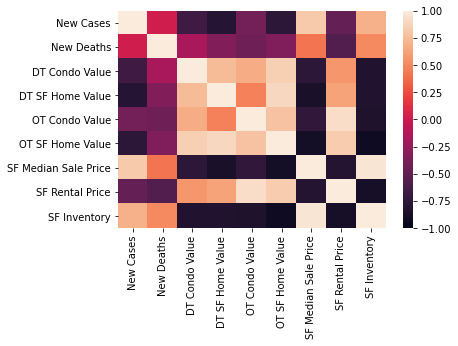

In [56]:
sns.heatmap(combined_sf_data_correlation, vmin=-1, vmax=1)

In [62]:
cumulative_downtown_condo_vs_outside_condo = (1+downtown_condo_vs_outside_condo).cumprod()
cumulative_downtown_condo_vs_outside_condo.head()

,Downtown Condo,Outside Condo
date,,
2019-02-28,0.997252,1.001183
2019-03-31,0.994049,1.001255
2019-04-30,0.985471,0.995814
2019-05-31,0.986858,0.999548
2019-06-30,0.989187,1.002433


In [63]:
cumulative_downtown_condo_vs_outside_condo.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [65]:
cumulative_downtown_home_vs_outside_home=(1+downtown_home_vs_outside_home).cumprod()
cumulative_downtown_home_vs_outside_home.head()

,Downtown Single Family Home,Outside Single Family Home
date,,
2019-02-28,1.001834,0.997586
2019-03-31,1.005218,0.992799
2019-04-30,1.003600,0.984070
2019-05-31,1.008531,0.987339
2019-06-30,1.019749,0.989291


In [66]:
cumulative_downtown_home_vs_outside_home.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [67]:
cumulative_downtown_condo_vs_outside_home = (1 + downtown_condo_vs_outside_home).cumprod()
cumulative_downtown_condo_vs_outside_home.head()

,Downtown Condo,Outside Single Family Home
date,,
2019-02-28,0.997252,0.997586
2019-03-31,0.994049,0.992799
2019-04-30,0.985471,0.984070
2019-05-31,0.986858,0.987339
2019-06-30,0.989187,0.989291


In [68]:
cumulative_downtown_condo_vs_outside_home.hvplot()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [71]:
import bls

In [100]:
unemployment_data = bls.get_series('LAUCN281070000000003', 2018, 2020 )
unemployment_data.columns = 'Unemployment Statistics'
unemployment_data.head()

C:\Users\Rodtwo\.conda\envs\pyvizenv\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


date
2018-01    6.9
2018-02    6.5
2018-03    6.3
2018-04    5.6
2018-05    5.8
Freq: M, Name: LAUCN281070000000003, dtype: float64

<AxesSubplot:xlabel='date'>

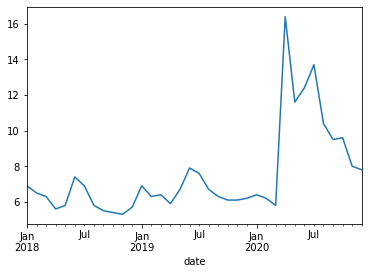

In [101]:
unemployment_data.plot()

In [102]:
unemployment_data = unemployment_data.reset_index()
unemployment_data['date'] = unemployment_data['date'].apply(lambda x: x.strftime('%Y-%m'))
unemployment_data.columns = ['date','Unemployment Rate']
unemployment_data.set_index('date', inplace=True)
unemployment_data.head()

,Unemployment Rate
date,
2018-01,6.9
2018-02,6.5
2018-03,6.3
2018-04,5.6
2018-05,5.8


In [78]:
pctchange_unemployment_data = unemployment_data.pct_change()
pctchange_unemployment_data.head()

date
2018-01         NaN
2018-02   -0.057971
2018-03   -0.030769
2018-04   -0.111111
2018-05    0.035714
Freq: M, Name: LAUCN281070000000003, dtype: float64

<AxesSubplot:xlabel='date'>

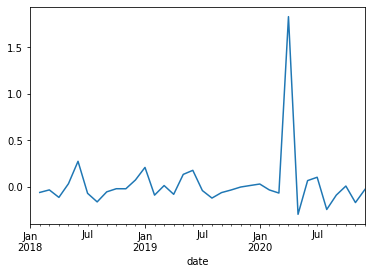

In [80]:
pctchange_unemployment_data.plot()

In [104]:
wu_combined_sf_data = combined_sf_data
wu_combined_sf_data = wu_combined_sf_data.reset_index()
wu_combined_sf_data['date'] = wu_combined_sf_data['date'].apply(lambda x: x.strftime('%Y-%m'))
wu_combined_sf_data.set_index('date', inplace=True)
wu_combined_sf_data.head()

,New Cases,New Deaths,Total Cases,Total Deaths,DT Condo Value,DT SF Home Value,OT Condo Value,OT SF Home Value,SF Median Sale Price,SF Rental Price,SF Inventory
date,,,,,,,,,,,
2020-03,404,5,404,5,1364804.00,2.604865e+06,1.261182e+06,2002280.250,830000.0,3293.0,5788.0
2020-04,1114,21,1518,26,1359996.50,2.595869e+06,1.257425e+06,2006781.000,850000.0,3292.0,6016.0
2020-05,983,16,2501,42,1296626.75,2.491827e+06,1.238403e+06,1972028.500,833750.0,3270.0,6568.0
2020-06,1100,8,3601,50,1284227.00,2.560207e+06,1.227085e+06,1988898.375,860000.0,3254.0,7370.0
2020-07,2525,9,6126,59,1255405.75,2.198641e+06,1.241849e+06,1945266.375,900000.0,3240.0,8636.0


In [105]:
wu_combined_sf_data = pd.concat([wu_combined_sf_data,unemployment_data],axis = "columns", join="inner")
wu_combined_sf_data.head()

,New Cases,New Deaths,Total Cases,Total Deaths,DT Condo Value,DT SF Home Value,OT Condo Value,OT SF Home Value,SF Median Sale Price,SF Rental Price,SF Inventory,Unemployment Rate
date,,,,,,,,,,,,
2020-03,404,5,404,5,1364804.00,2.604865e+06,1.261182e+06,2002280.250,830000.0,3293.0,5788.0,5.8
2020-04,1114,21,1518,26,1359996.50,2.595869e+06,1.257425e+06,2006781.000,850000.0,3292.0,6016.0,16.4
2020-05,983,16,2501,42,1296626.75,2.491827e+06,1.238403e+06,1972028.500,833750.0,3270.0,6568.0,11.6
2020-06,1100,8,3601,50,1284227.00,2.560207e+06,1.227085e+06,1988898.375,860000.0,3254.0,7370.0,12.4
2020-07,2525,9,6126,59,1255405.75,2.198641e+06,1.241849e+06,1945266.375,900000.0,3240.0,8636.0,13.7


In [106]:
wu_combined_sf_data_correlation = wu_combined_sf_data.corr()
wu_combined_sf_data_correlation

,New Cases,New Deaths,Total Cases,Total Deaths,DT Condo Value,DT SF Home Value,OT Condo Value,OT SF Home Value,SF Median Sale Price,SF Rental Price,SF Inventory,Unemployment Rate
New Cases,1.000000,0.025992,0.703186,0.585726,-0.664913,-0.798922,-0.409818,-0.759385,0.824347,-0.483196,0.701477,-0.017823
New Deaths,0.025992,1.000000,0.461805,0.544443,-0.169612,-0.345999,-0.444331,-0.356571,0.417705,-0.573242,0.512240,0.058622
Total Cases,0.703186,0.461805,1.000000,0.976694,-0.710406,-0.756462,-0.900634,-0.921301,0.921387,-0.959389,0.945544,-0.341628
Total Deaths,0.585726,0.544443,0.976694,1.000000,-0.677329,-0.716166,-0.914026,-0.887088,0.857461,-0.977338,0.908715,-0.301117
DT Condo Value,-0.664913,-0.169612,-0.710406,-0.677329,1.000000,0.747085,0.675964,0.849191,-0.764909,0.568557,-0.826071,0.026106
DT SF Home Value,-0.798922,-0.345999,-0.756462,-0.716166,0.747085,1.000000,0.472977,0.898124,-0.859922,0.625793,-0.825427,0.101049
OT Condo Value,-0.409818,-0.444331,-0.900634,-0.914026,0.675964,0.472977,1.000000,0.781652,-0.735005,0.929049,-0.840883,0.358467
OT SF Home Value,-0.759385,-0.356571,-0.921301,-0.887088,0.849191,0.898124,0.781652,1.000000,-0.894336,0.830800,-0.928815,0.285377
SF Median Sale Price,0.824347,0.417705,0.921387,0.857461,-0.764909,-0.859922,-0.735005,-0.894336,1.000000,-0.809687,0.961288,-0.132214
SF Rental Price,-0.483196,-0.573242,-0.959389,-0.977338,0.568557,0.625793,0.929049,0.830800,-0.809687,1.000000,-0.876547,0.427208


<AxesSubplot:>

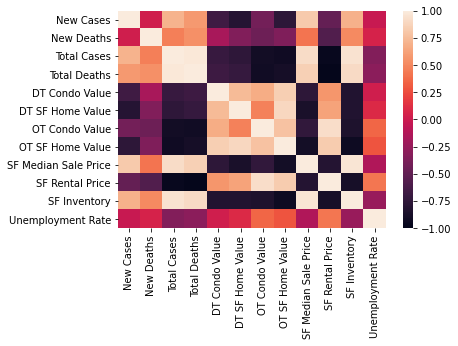

In [107]:
sns.heatmap(wu_combined_sf_data_correlation, vmin=-1, vmax=1)